In [1]:
#importando bibliotecas

import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [2]:
#Obtendo dados através da API do Banco Central do Brasil

def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [3]:
#Consullta na API do Banco Central do Brasil

ipca = consulta_bc(433)

In [4]:
igpm = consulta_bc(189)

<AxesSubplot:xlabel='data'>

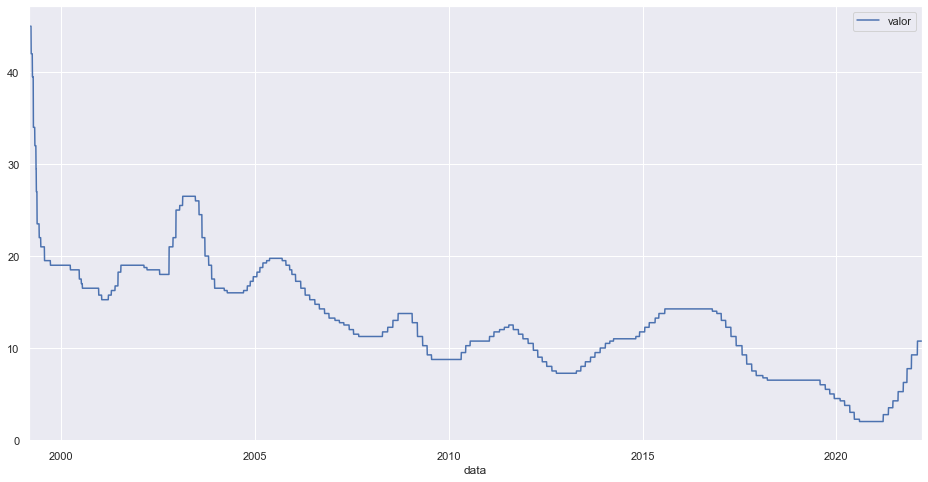

In [5]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [6]:
reservas_internacionais = consulta_bc(13621)

<AxesSubplot:xlabel='data'>

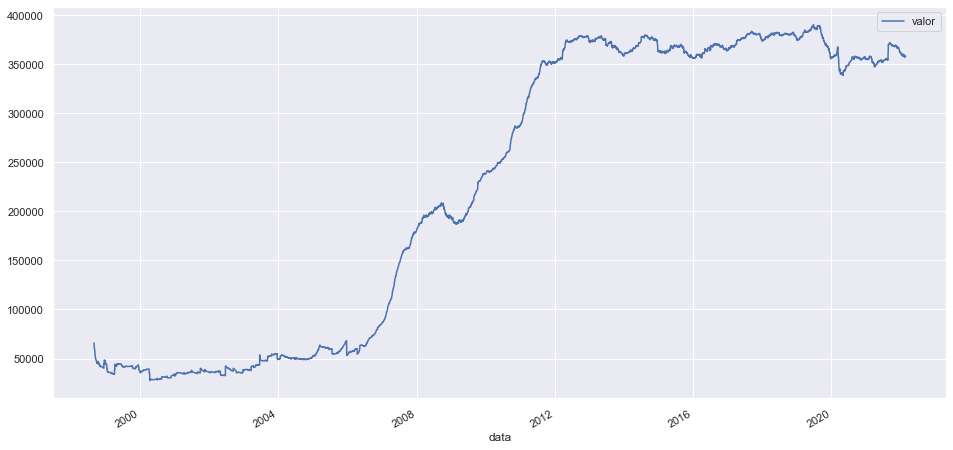

In [7]:
reservas_internacionais.plot()

In [8]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,8.0
2012-04-01,7.8
2012-05-01,7.7
2012-06-01,7.6
2012-07-01,7.5
...,...
2021-07-01,13.7
2021-08-01,13.1
2021-09-01,12.6


In [9]:
#Consulta mostrando CDI x IBOV

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=b5981a6bfab609c2a4aa75e0604f31cfe97780a0ea25437d5c64d1fd82737606
  Stored in directory: C:\Users\klope\AppData\Local\Temp\pip-ephem-wheel-cache-jcznzx0s\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [10]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [11]:
ibov_retorno = ibov.pct_change()

In [12]:
cdi = consulta_bc(12)

In [13]:
data_inicio = '2018-01-01'

In [14]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [15]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

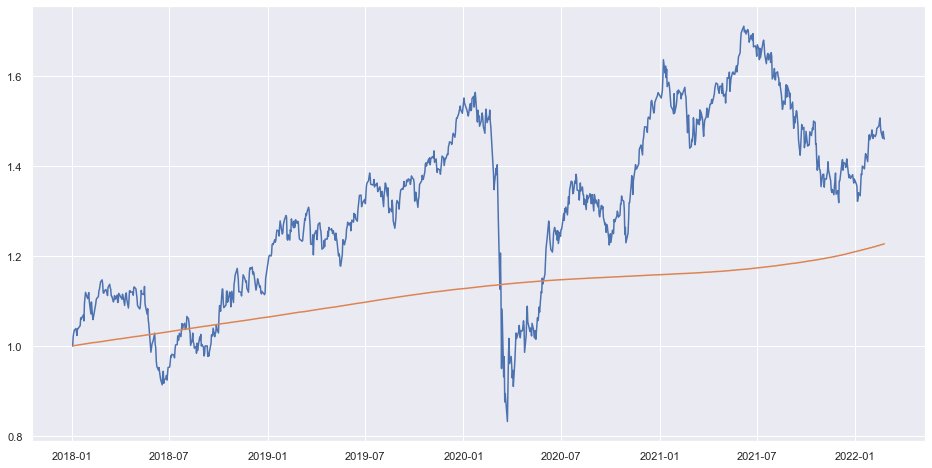

In [16]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);